In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/Users/monicashen/Desktop/Customer DC Inventory.csv', header=[0,1])

In [24]:
need_state_info = df.index.get_level_values(0)

In [25]:
store_amt_columns = [col for col in df.columns if 'Store Amt On Hand' in col[1]]

In [26]:
store_data = pd.DataFrame(df[store_amt_columns].values, index=need_state_info, columns=store_amt_columns)

In [27]:
store_data.reset_index(inplace=True)
store_data.columns = ['Need State'] + [f'Week {i+1}' for i in range(len(store_amt_columns))]

In [28]:
store_data_long = store_data.melt(id_vars='Need State', var_name='Week', value_name='Inventory')

In [13]:
print(df.index)

RangeIndex(start=0, stop=13, step=1)


In [14]:
print(df.columns)

MultiIndex([(         'Unnamed: 0_level_0', 'Unnamed: 0_level_1'),
            (         'Unnamed: 1_level_0', 'Unnamed: 1_level_1'),
            ('Fiscal Year  /  Fiscal Week',               '2021'),
            ('Fiscal Year  /  Fiscal Week',             '2021.1'),
            ('Fiscal Year  /  Fiscal Week',             '2021.2'),
            ('Fiscal Year  /  Fiscal Week',             '2021.3'),
            ('Fiscal Year  /  Fiscal Week',             '2021.4'),
            ('Fiscal Year  /  Fiscal Week',             '2021.5'),
            ('Fiscal Year  /  Fiscal Week',             '2021.6'),
            ('Fiscal Year  /  Fiscal Week',             '2021.7'),
            ...
            ('Fiscal Year  /  Fiscal Week',            '2023.42'),
            ('Fiscal Year  /  Fiscal Week',            '2023.43'),
            ('Fiscal Year  /  Fiscal Week',            '2023.44'),
            ('Fiscal Year  /  Fiscal Week',            '2023.45'),
            ('Fiscal Year  /  Fiscal Week',   

In [32]:
store_data_long['Year'] = store_data_long['Week'].apply(lambda x: int(x.split(' ')[-1].split('.')[0]))

In [33]:
store_data_long['Week'] = store_data_long['Week'].apply(lambda x: int(x.split('.')[-1]))

In [41]:
store_data_long['Inventory'] = pd.to_numeric(store_data_long['Inventory'], errors='coerce') / 1000

In [39]:
print(store_data_long['Year'].value_counts())

Series([], Name: count, dtype: int64)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


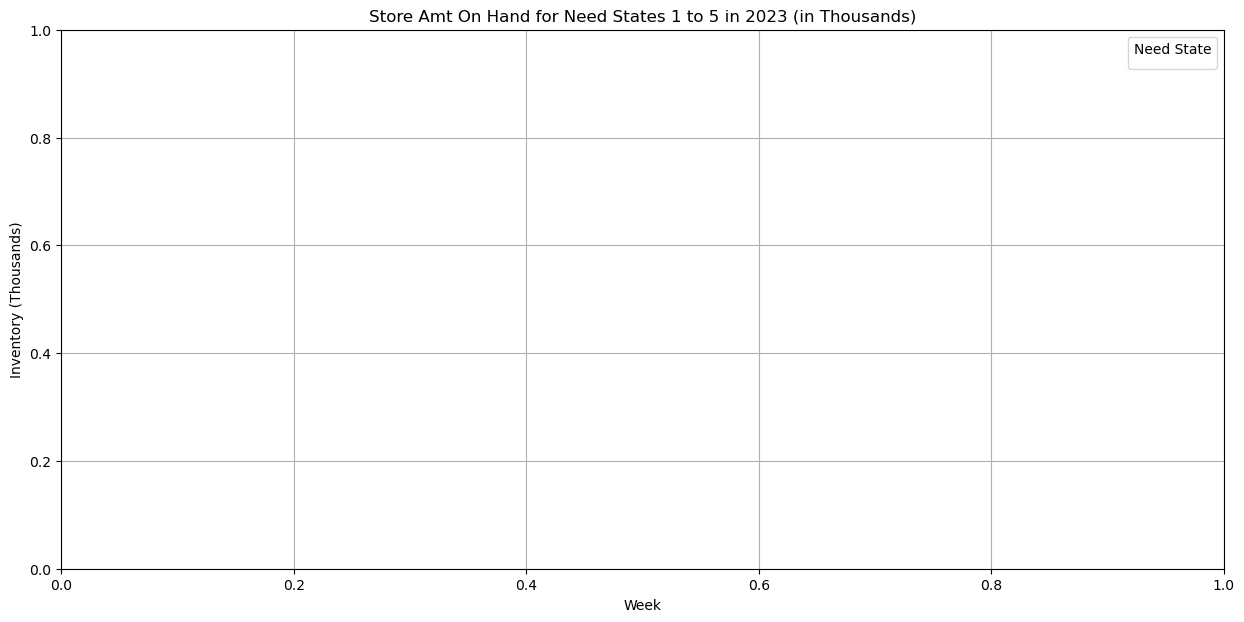

In [44]:
year = 2023
plt.figure(figsize=(15, 7))
yearly_data = store_data_long[store_data_long['Year'] == year]
sns.lineplot(data=yearly_data, x='Week', y='Inventory', hue='Need State')
plt.title(f'Store Amt On Hand for Need States 1 to 5 in {year} (in Thousands)')
plt.xlabel('Week')
plt.ylabel('Inventory (Thousands)')
plt.legend(title='Need State')
plt.grid(True)
plt.show()